# Upper-Limb Functioning Analysis

This notebooks demonstrates how to use the `ulfunc` package of the ``monalysa`` 
library to quantify different constructs of upper limb functioning.

### To be done (as of Dec 16 2023):
The current tutorial only demonstrates the pitch estimation functions. The future 
updates will demonstrate how to use the other functions in the library.

Contact siva82kb@gmail.com for any queries.

### Install the most recent monalysa library

```python
!pip install monalysa
```

In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pathlib
import pandas as pd

In [3]:
from monalysa import ulfunc

### Pitch angle estimation from a forearm arccelerometer data

(-100.0, 100.0)

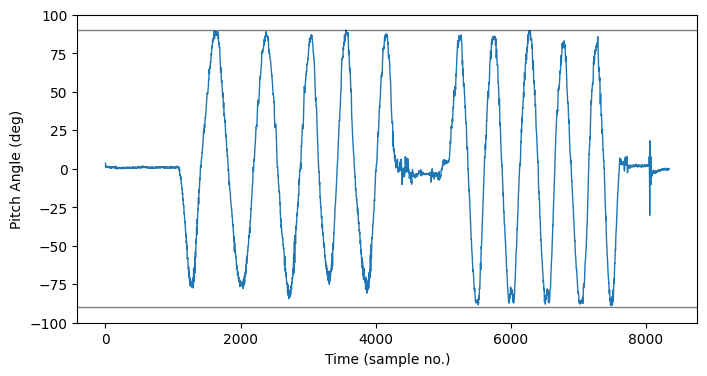

In [4]:
# Data directory.
datadir = pathlib.Path("../../../data/ag_data/")

# Read the accelerometer data.
accl_data = pd.read_csv(datadir / "accl_pitch.csv", sep=",")

# Estimate the pitch angle from `estimate_accl_pitch`.
# The y-axis of the accelerometer points in the direction of the forearm, 
# pointing aware from the elbow joint.
pitch = ulfunc.uluse.estimate_accl_pitch(accl_data.values, farm_inx=1,
                                         elb_to_farm=True, nwin=1)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pitch, lw=1)
ax.axhline(-90, lw=1, color='k', alpha=0.5)
ax.axhline(90, lw=1, color='k', alpha=0.5)
ax.set_xlabel("Time (sample no.)")
ax.set_ylabel("Pitch Angle (deg)")
ax.set_ylim(-100, 100)

In [4]:
import numpy as np
from monalysa.ulfunc import uluse
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th1, th2l, th2h = 3, 1, 4
_, u1 = uluse.from_vec_mag(vmag, thresh=th1)
_, u2 = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)

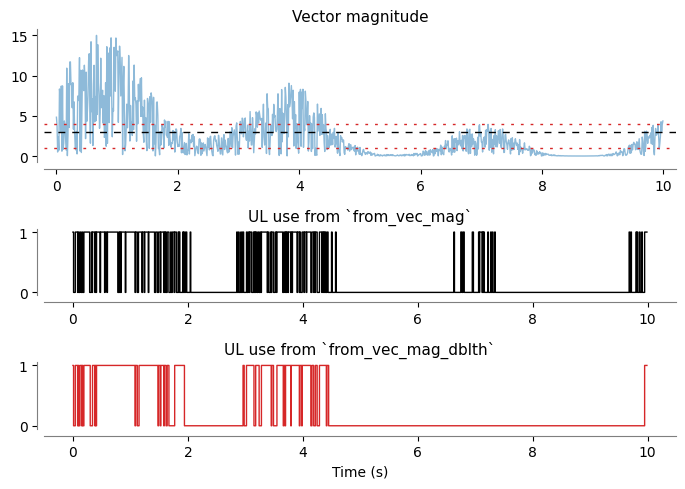

In [6]:
fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th1, lw=1, color='k', ls="dashed", dashes=(5, 5))
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.step(t, u1, lw=1, color="k")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.set_title("UL use from `from_vec_mag`", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.step(t, u2, lw=1, color="tab:red")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_xlabel("Time (s)")
ax2.set_title("UL use from `from_vec_mag_dblth`", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_from_vec_mag.svg", format="svg")

In [17]:
import numpy as np
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th1, th2l, th2h = 3, 1, 4
_, u1 = uluse.from_vec_mag(vmag, thresh=th1)
_, u2 = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, i1 = ulint.from_vec_mag(vmag, u1, 1)
_, i2 = ulint.from_vec_mag(vmag, u2, 1)
_inx1, avgi1 = ulint.average_intuse(i1, u1, windur=0.25, winshift=0.05, fs=fs)
_inx2, avgi2 = ulint.average_intuse(i2, u2, windur=0.25, winshift=0.05, fs=fs)

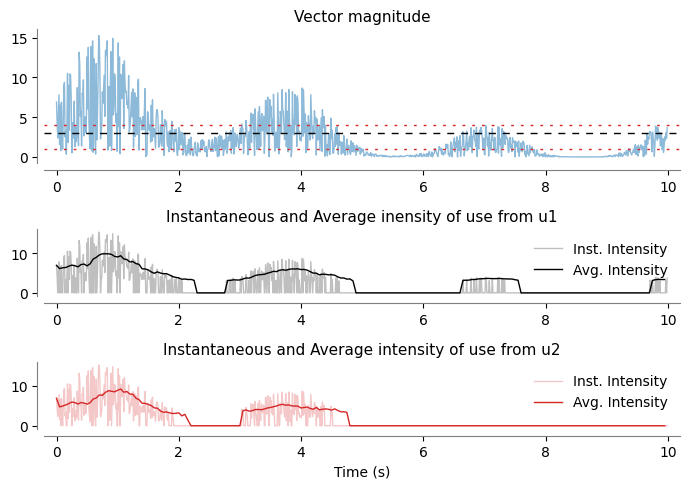

In [27]:
fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th1, lw=1, color='k', ls="dashed", dashes=(5, 5))
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.plot(t, i1, lw=1, color="k", alpha=0.25, label="Inst. Intensity")
ax1.plot(t[_inx1], avgi1, lw=1, color="k", alpha=1, label="Avg. Intensity")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.legend(loc="upper right", frameon=False, fontsize=10)
ax1.set_xlim(-0.2, 10.2)
ax1.set_title("Instantaneous and Average inensity of use from u1", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.plot(t, i2, lw=1, color="tab:red", alpha=0.25, label="Inst. Intensity")
ax2.plot(t[_inx2], avgi2, lw=1, color="tab:red", alpha=1, label="Avg. Intensity")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_xlabel("Time (s)")
ax2.legend(loc="upper right", frameon=False, fontsize=10)
ax2.set_xlim(-0.2, 10.2)
ax2.set_title("Instantaneous and Average intensity of use from u2", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_vec_mag_int.svg", format="svg")

In [3]:
import numpy as np
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th2l, th2h = 1, 4
_, _use = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, _int = ulint.from_vec_mag(vmag, _use, 1)
_inxu, _avgu = uluse.average_uluse(_use, windur=0.25, winshift=0.05, fs=fs)
_inxi, _avgi = ulint.average_intuse(_int, _use, windur=0.25, winshift=0.05, fs=fs)
_inxa, _avga = measures.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)

True

In [4]:
_inxa, _avga = measures.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)

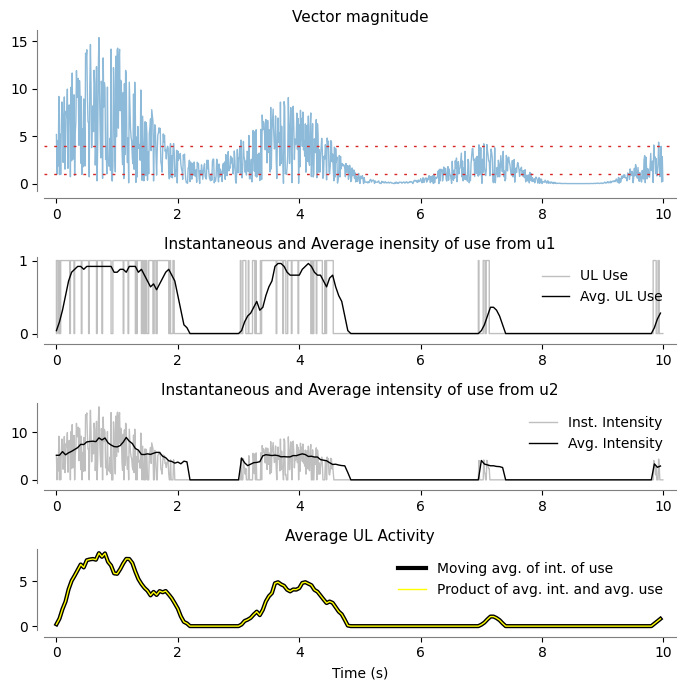

In [15]:
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(4, 1, height_ratios=[2, 1, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.step(t, _use, lw=1, color="k", alpha=0.25, label="UL Use")
ax1.plot(t[_inxu], _avgu, lw=1, color="k", alpha=1, label="Avg. UL Use")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.legend(loc="upper right", frameon=False, fontsize=10)
ax1.set_xlim(-0.2, 10.2)
ax1.set_title("Instantaneous and Average inensity of use from u1", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.plot(t, _int, lw=1, color="k", alpha=0.25, label="Inst. Intensity")
ax2.plot(t[_inxi], _avgi, lw=1, color="k", alpha=1, label="Avg. Intensity")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.legend(loc="upper right", frameon=False, fontsize=10)
ax2.set_xlim(-0.2, 10.2)
ax2.set_title("Instantaneous and Average intensity of use from u2", fontsize=11)

ax3 = plt.subplot(gs[3])
ax3.plot(t[_inxa], _avga, lw=3, color="k", alpha=1, label="Moving avg. of int. of use")
ax3.plot(t[_inxa], _avgi * _avgu, lw=1, color="yellow", alpha=1, label="Product of avg. int. and avg. use")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_position(('outward', 5))
ax3.spines['bottom'].set_position(('outward', 5))
ax3.spines['left'].set_color("tab:gray")
ax3.spines['bottom'].set_color("tab:gray")
ax3.set_xlabel("Time (s)")
ax3.legend(loc="upper right", frameon=False, fontsize=10)
ax3.set_xlim(-0.2, 10.2)
ax3.set_title("Average UL Activity", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_vec_mag_act.svg", format="svg")

In [30]:
import numpy as np
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
np.random.seed(0)
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th2l, th2h = 1, 4
_, _use = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, _int = ulint.from_vec_mag(vmag, _use, 1)
_inxu, _avgu = uluse.average_uluse(_use, windur=0.25, winshift=0.05, fs=fs)
_inxi, _avgi = ulint.average_intuse(_int, _use, windur=0.25, winshift=0.05, fs=fs)
_inxa, _avga = ulint.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)
measures.Hq(_avga, q=90)

6.128198834355528

In [21]:
import numpy as np
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
np.random.seed(0)
fs = 100
t = np.arange(0, 12, 1. / fs)
_intr = (np.sin(t) + 1) * (t > 2.0) * np.random.rand(len(t))
_intr[400:500] = 0
_intl = (np.sin(t - np.pi) + 1) * (t < 8.0) * np.random.rand(len(t))
_intl[400:500] = 0
_, _linxinst = measures.instantaneous_latindex(_intr, _intl)
_inxl, _avgli = measures.average_latindex(_linxinst, windur=0.25, winshift=0.05, fs=fs)

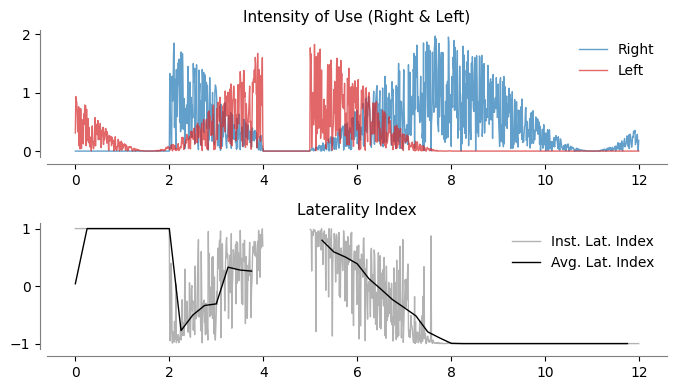

In [29]:
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, _intr, lw=1, alpha=0.7, color="tab:blue", label="Right")
ax0.plot(t, _intl, lw=1, alpha=0.7, color="tab:red", label="Left")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("Intensity of Use (Right & Left)", fontsize=11)
ax0.legend(loc="upper right", frameon=False, fontsize=10)

ax2 = plt.subplot(gs[1])
ax2.plot(t, _linxinst, lw=1, color="k", alpha=0.3, label="Inst. Lat. Index")
ax2.plot(t[_inxl], _avgli, lw=1, color="k", label="Avg. Lat. Index")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_title("Laterality Index", fontsize=11)
ax2.legend(loc="upper right", frameon=False, fontsize=10)

plt.tight_layout()

fig.savefig("latinx.svg", format="svg")